# Convección 1D

La convección 1D es el primer paso en tratar de simular las ecuaciones de Navier-Stokes.

La ecuación que describe la convección 1D es
$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x}=0$$

Cuya solución es simplemente $u(x,t)=f(x-ct)$. Si se imponen condiciones iniciales $u(x,0)=u_0(x)$, entonces la solución en el tiempo es la propagación de la concdicion inicial, $\textit{i.e.}$ $u(x,t)=u_0(x-ct)$

Utilizando el método de diferencias finitas podemos discretizar el espacio y tiempo, y la función u y sus derivadas.

Distizaremos el espacio y tiempo con una malla de la forma $(x,t)=(i\Delta x,n\Delta t)\rightarrow (i,n)$. De igual forma pondremos $u(x,t) = u(i\Delta x,n\Delta t) = u_i^n$.

Así podemos aproximar las derivadas de u como:
$$\frac{\partial u}{\partial t}(x,t) \approx \frac{u_i^{n+1}-u_i^n}{\Delta t}$$
$$\frac{\partial u}{\partial x}(x,t) \approx \frac{u_{i}^n-u_{i-1}^n}{\Delta x}$$

Sustituyendo la aproximación en nuestra ecuación diferencial obtenemos:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c\frac{u_{i}^n-u_{i-1}^n}{\Delta x} = 0$$

De donde podemos despejar el siguiente paso como
$$u_i^{n+1}=u_i^n - c\frac{\Delta t}{\Delta x}\left(u_{i}^n-u_{i-1}^n\right) $$

In [32]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from matplotlib import animation
from JSAnimation import IPython_display
%matplotlib inline

In [71]:
def avance_en_tiempo(u0, nt, nx, dt, dx, flag=False):
    c = 1.          #La velocidad de la propagacion
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    un = ones(nx)
    #Este arreglo va guardando todos los pasos en el tiempo
    if flag: hist=[]
        
    u = u0
    for n in range(nt):
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        
        if flag: hist.append(un)
        
        #Para cada punto en el espacio se calcula el valor de la funcion en el tiempo siguiente
        for i in range(1, nx):
            u[i] = un[i]-c*dt/(dx)*(un[i]-un[i-1])

    if flag:
        return hist
    else:
        return u

A continuación ponemos las condiciones iniciales como una funcion escalon

$$
u_0(x) = 
    \begin{cases} 
    2 & : x \in (0.1,0.5)\\
    1 & : x \in (0,0.1)\bigcup(0.5,2)
  \end{cases}
$$

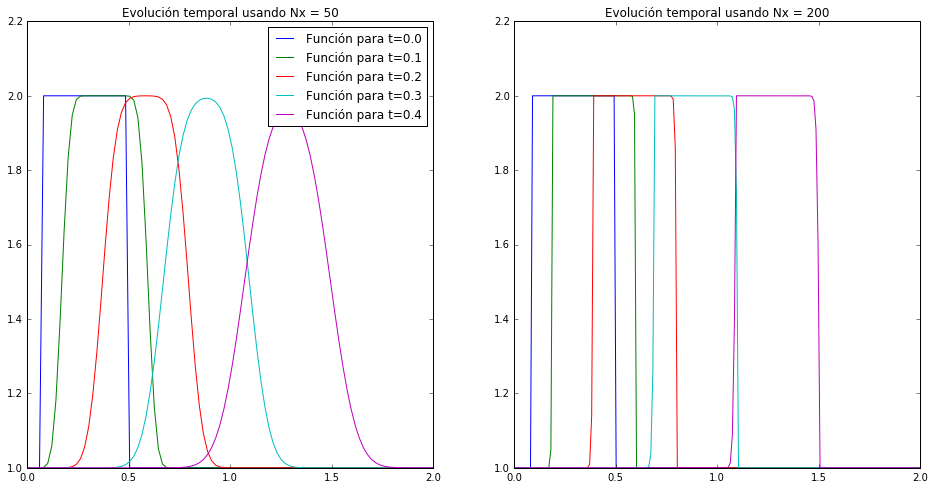

In [97]:
L = 2.          #Longitud de la malla
dt = 0.01       #Separacion temporal, Delta t
nx1= 100
nx2= 200

f, (ax, bx) = subplots(1, 2, figsize=(16, 8))
#Condicion inicial primer grafico
dx1 = L/(nx1-1)
u01 = ones(nx1)
u01[int(.1/dx1) : int(0.5/dx1+1.)]=2

#Condicion inicial segundo grafico
dx2 = L/(nx2-1.)
u02 = ones(nx2)
u02[int(.1/dx2) : int(0.5/dx2+1.)]=2

for nt in range(0, 50, 10):
    ax.plot(linspace(0,L,nx1), avance_en_tiempo(u01, nt, nx1, dt, dx1),label=u'Función para t='+str(nt*dt))
    bx.plot(linspace(0,L,nx2), avance_en_tiempo(u02, nt, nx2, dt, dx2),label=u'Función para t='+str(nt*dt))

ax.set_title(u"Evolución temporal usando Nx = 50")
bx.set_title(u"Evolución temporal usando Nx = 200")
ax.legend()

Notemos que claramente la evolución temporal de la solución varía según que tan buena sea la malla espacial utilizando la misma separación temporal en ambos casos, de la misma forma la solución depende el paso temporal realizado.


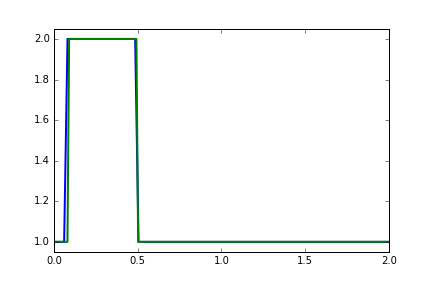
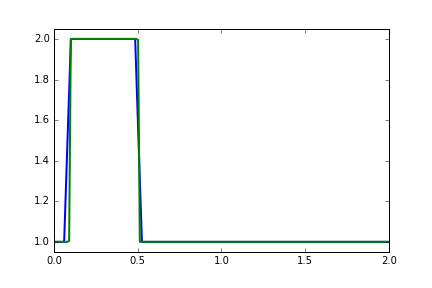
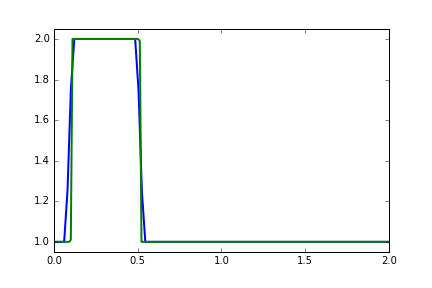
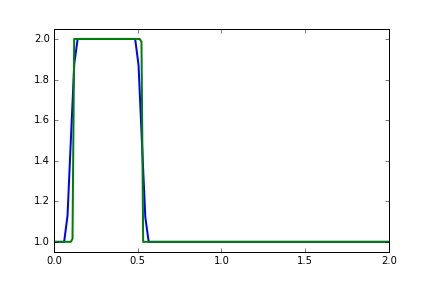
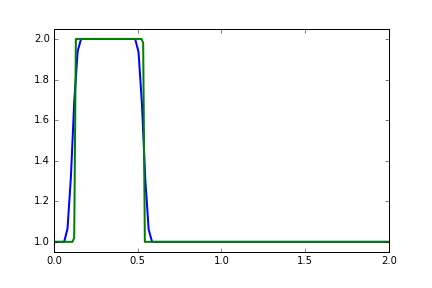
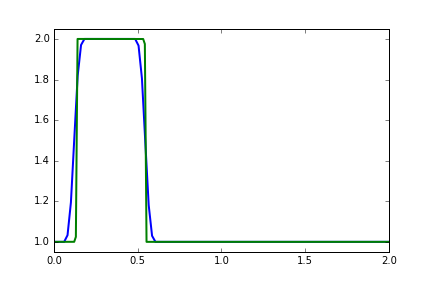
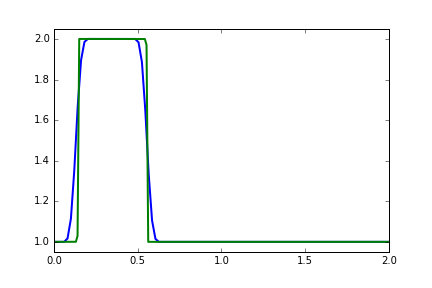
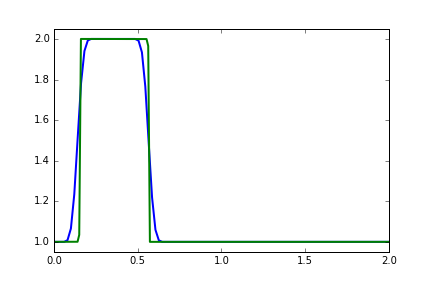
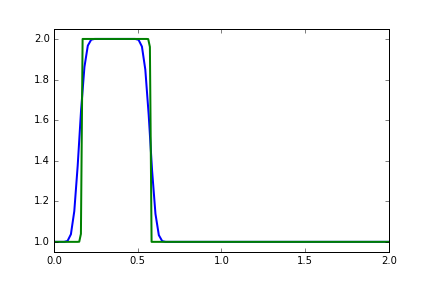
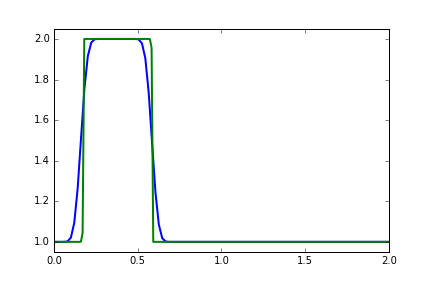
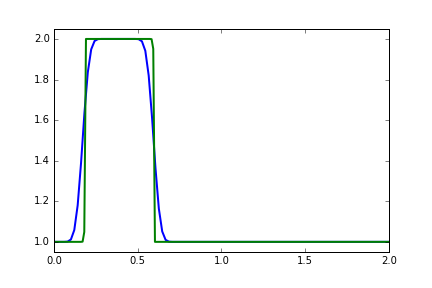
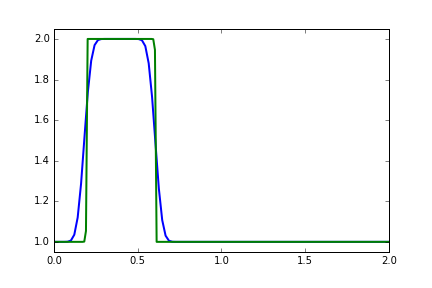
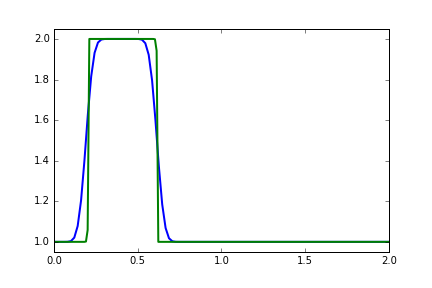
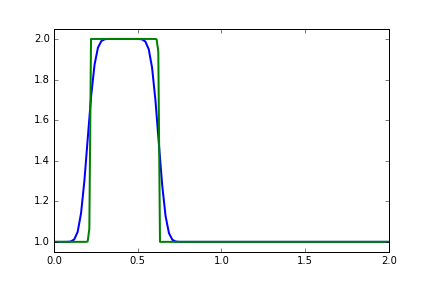
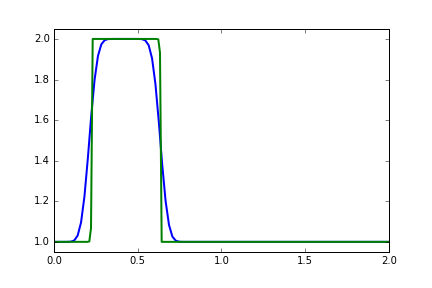
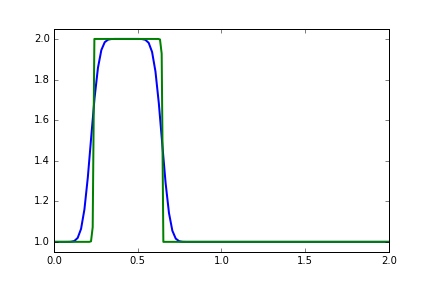
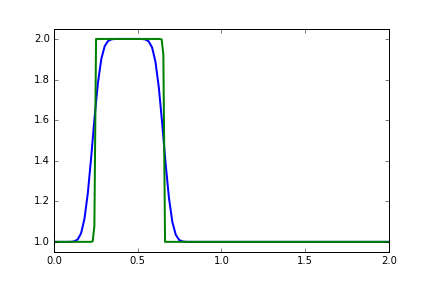
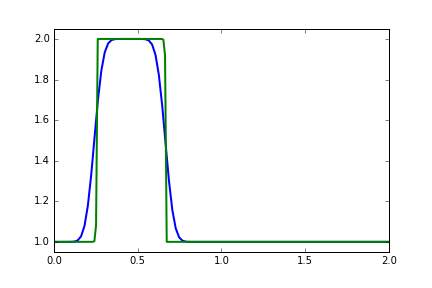
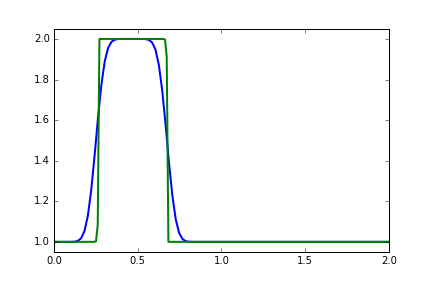
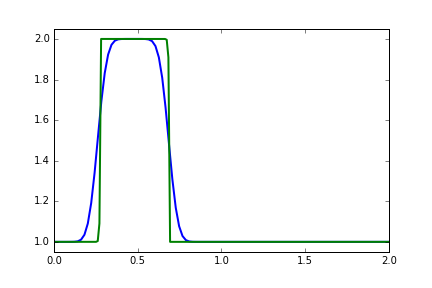
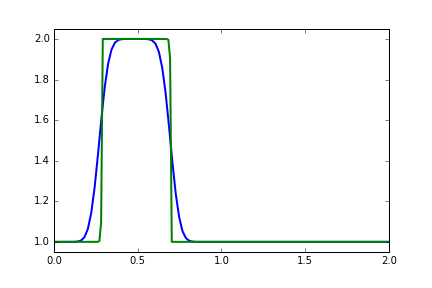
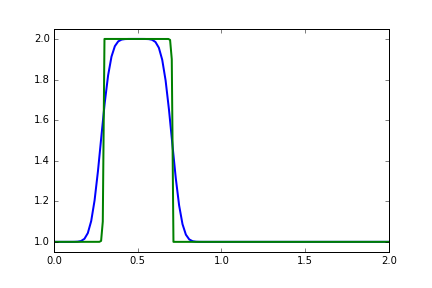
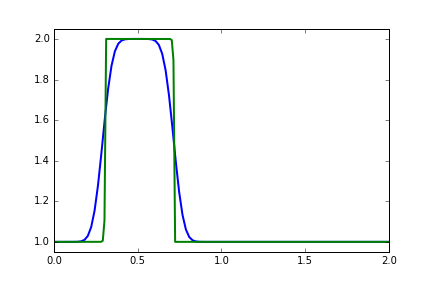
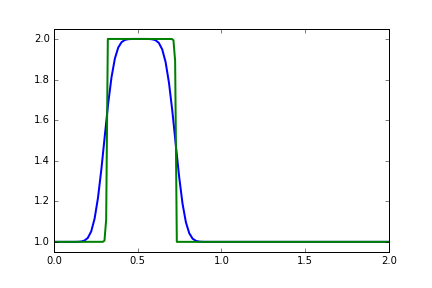
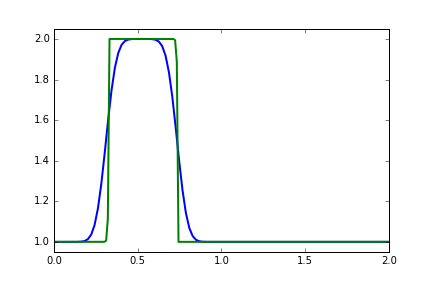
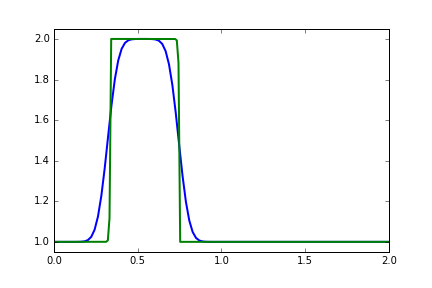
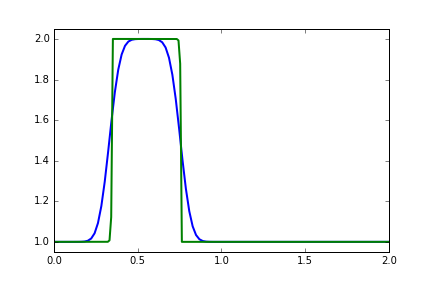
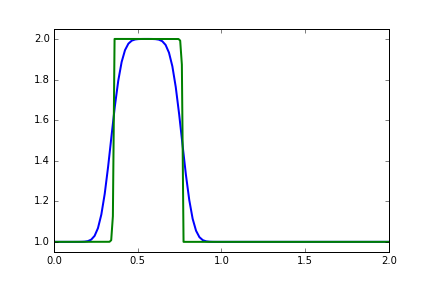
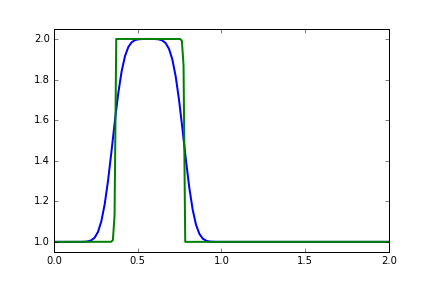
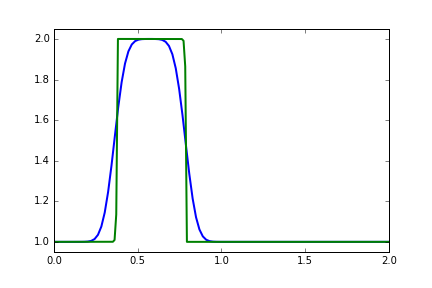
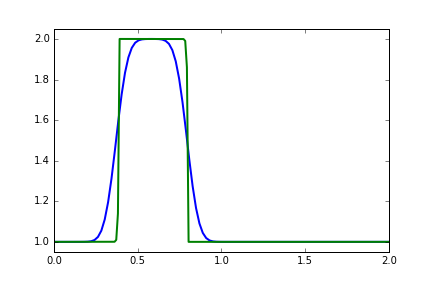
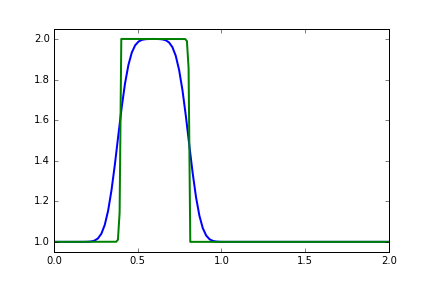
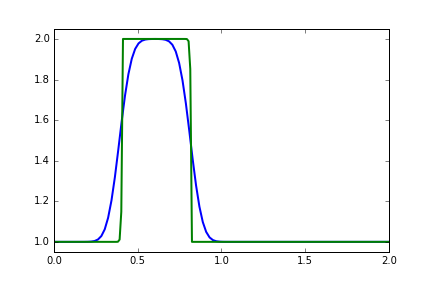
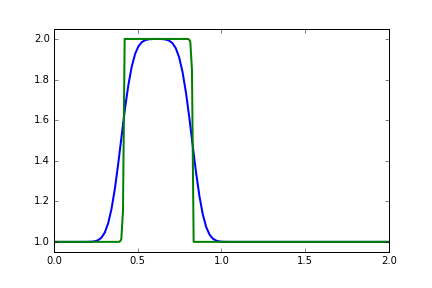
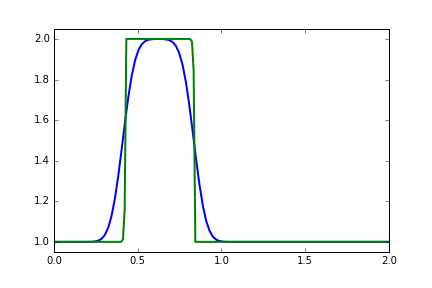
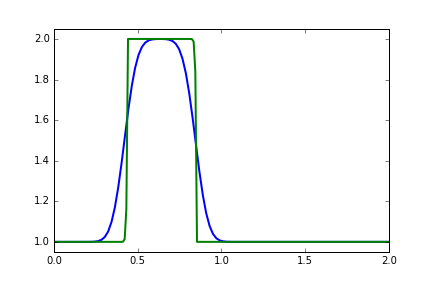
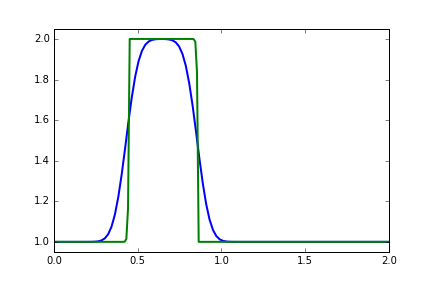
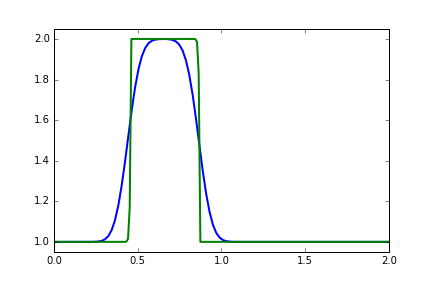
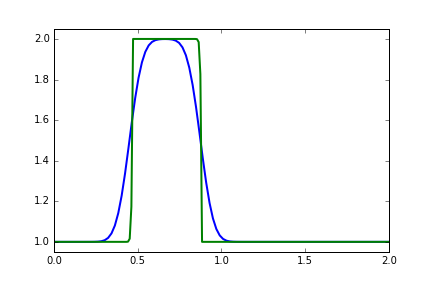
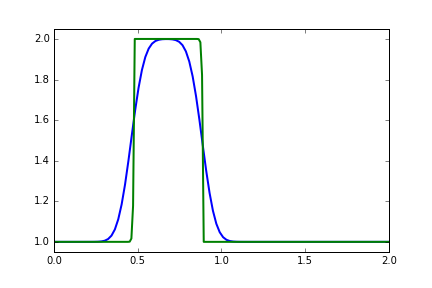
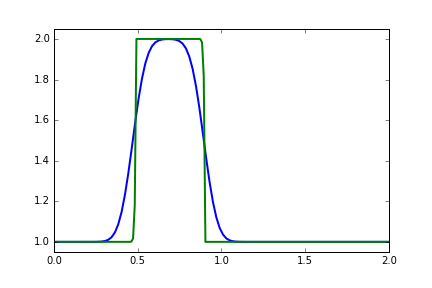
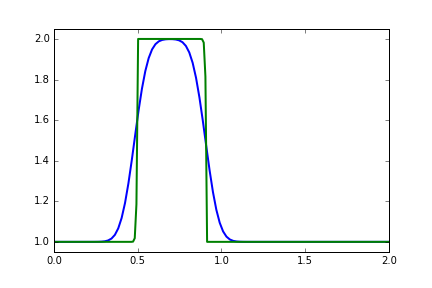
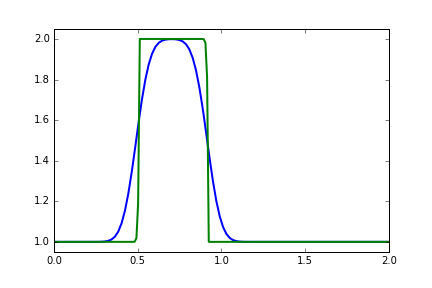
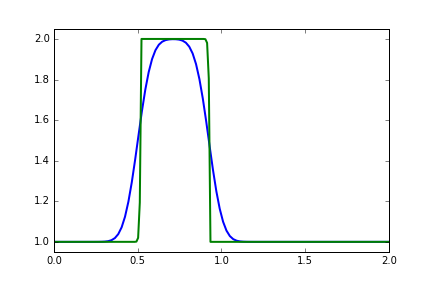
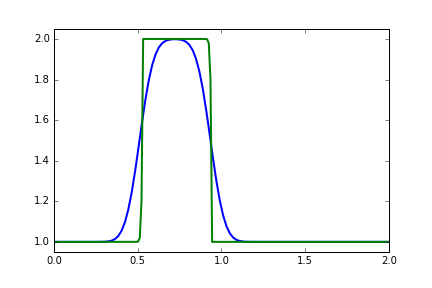
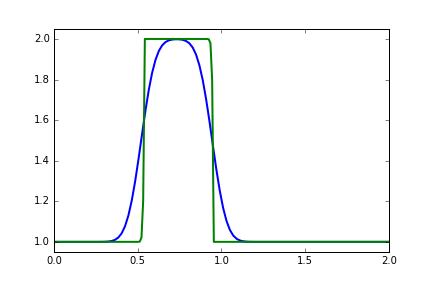
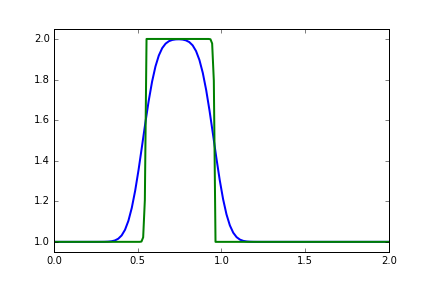
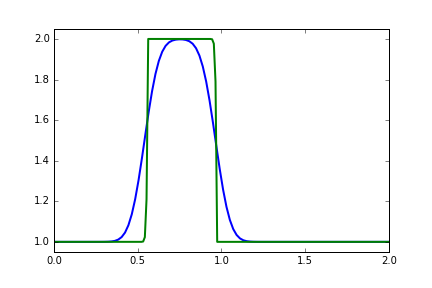
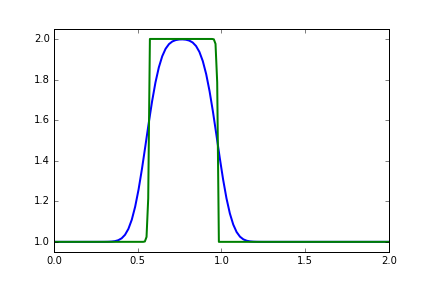
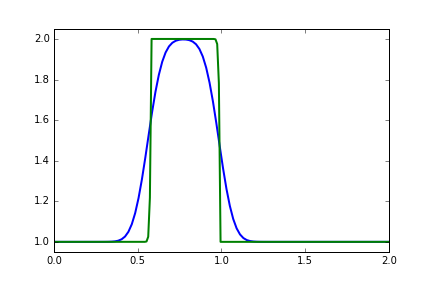
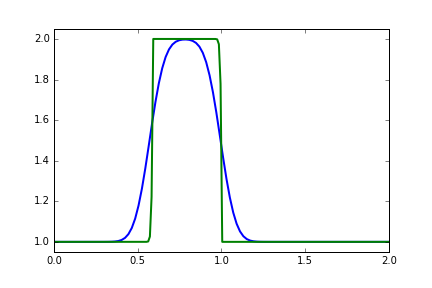
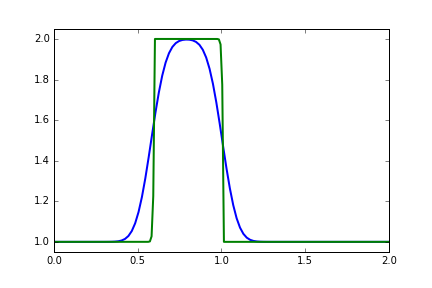
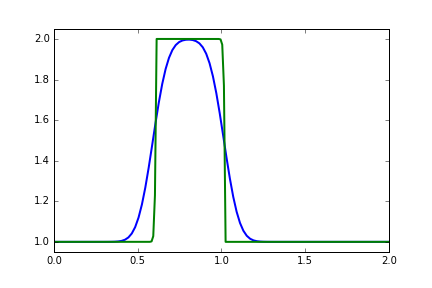
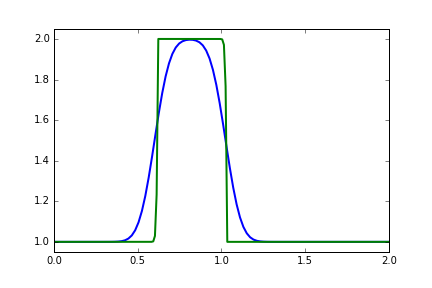
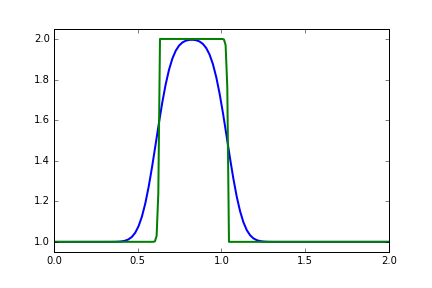
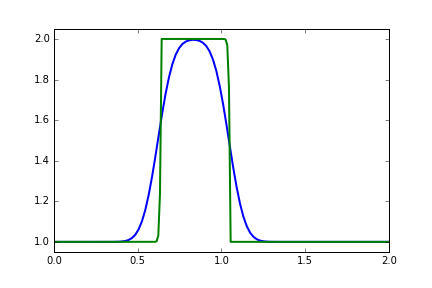
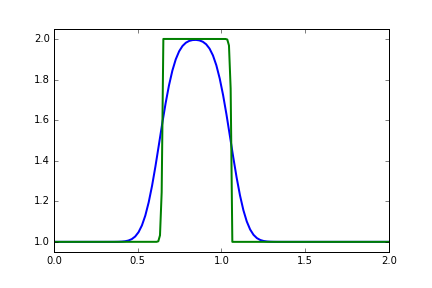
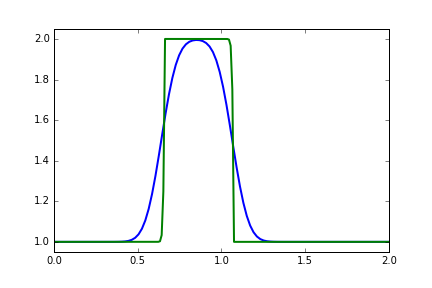
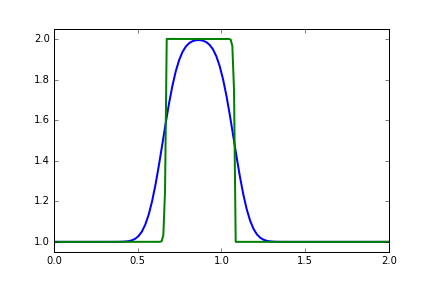
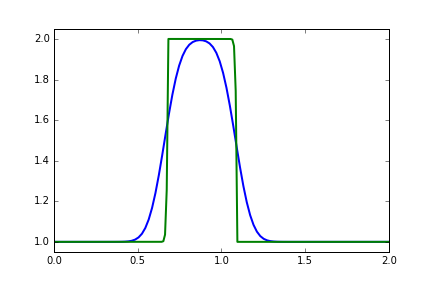
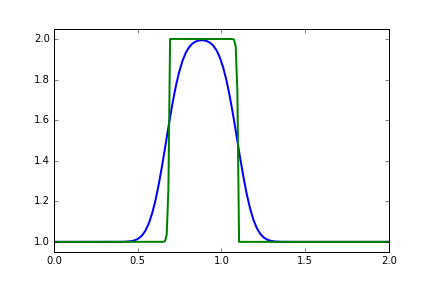
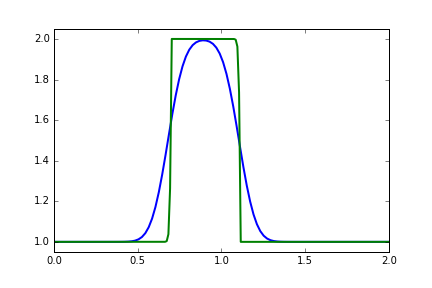
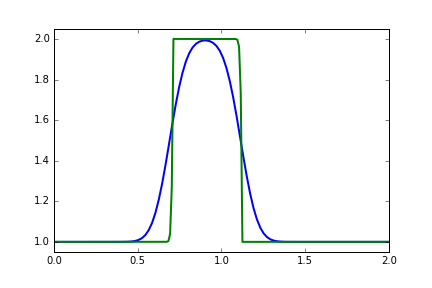
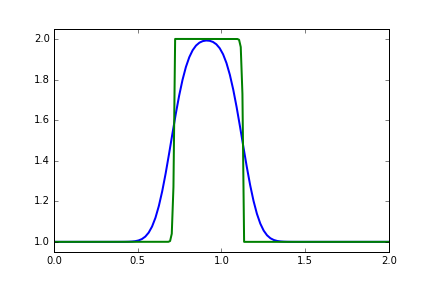
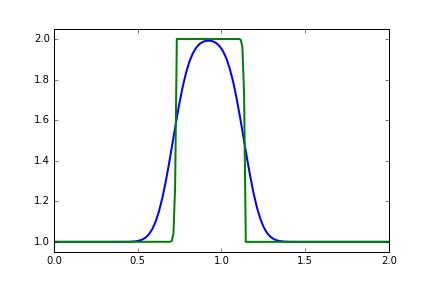
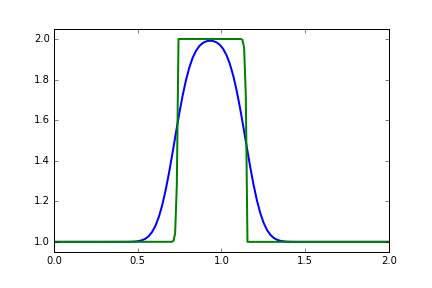
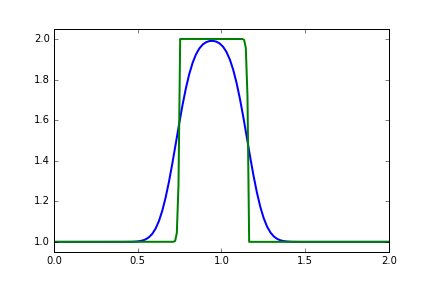
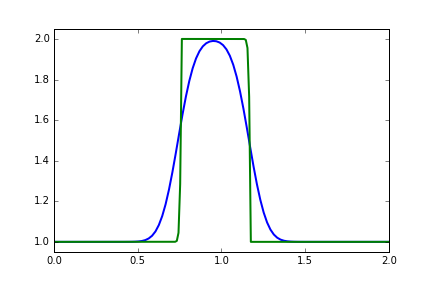
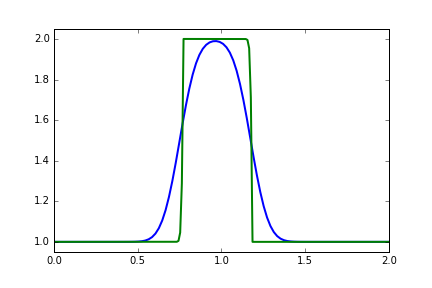
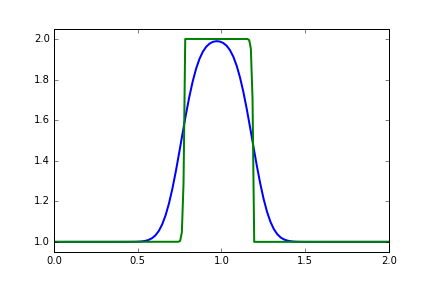
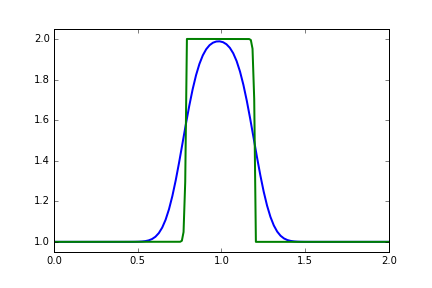
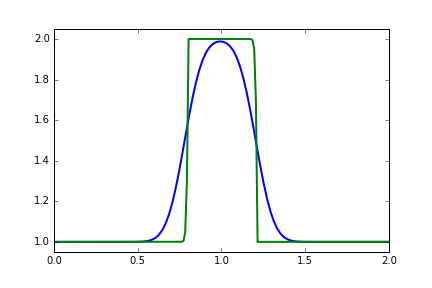
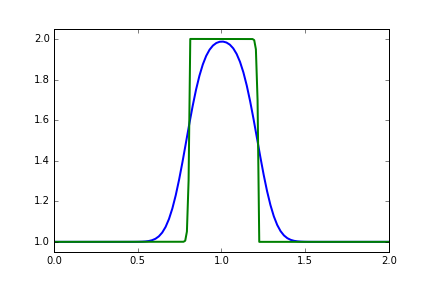
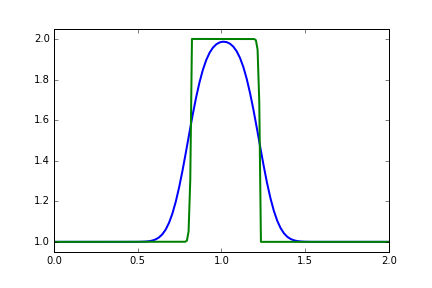
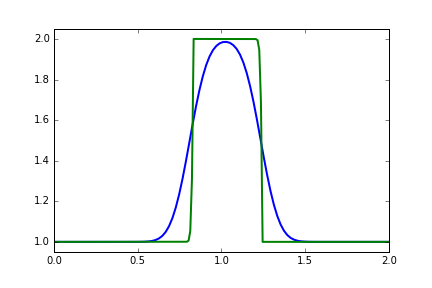
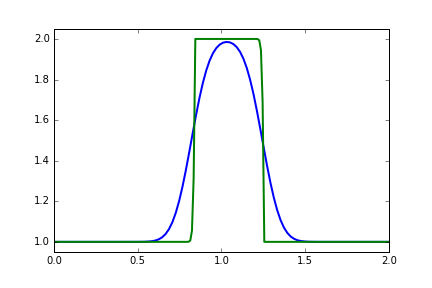
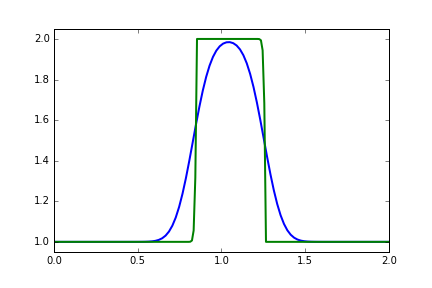
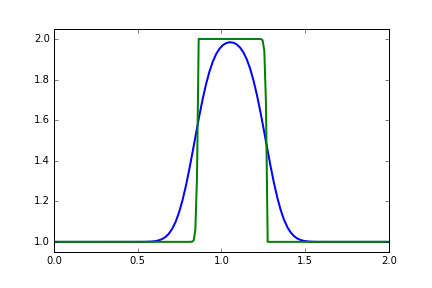
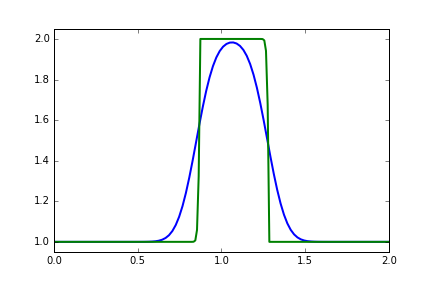
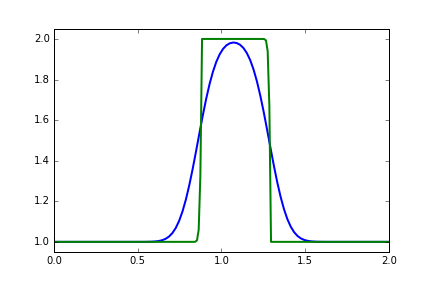
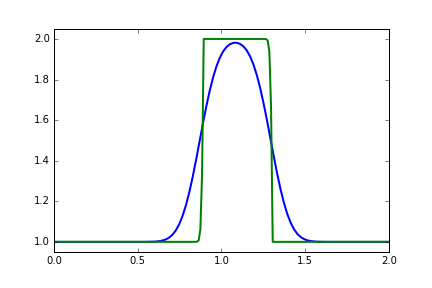
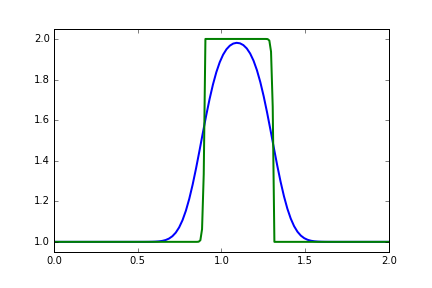
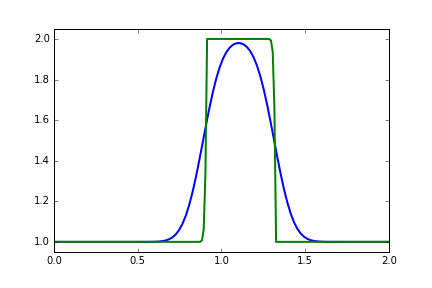
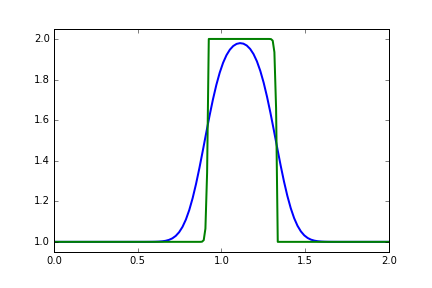
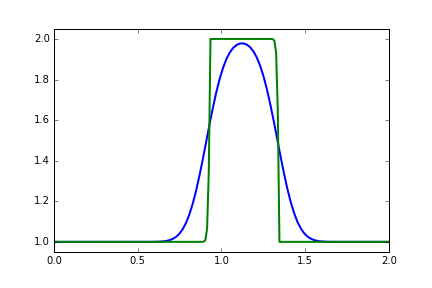
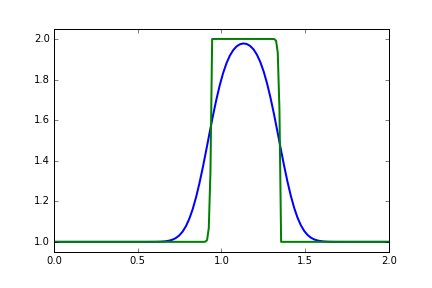
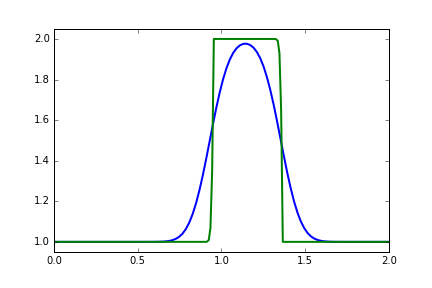
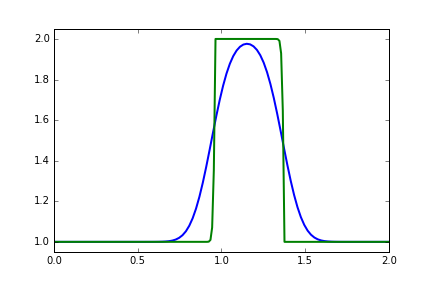
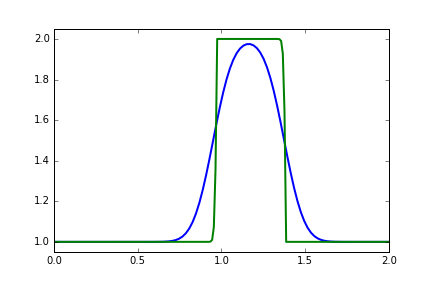
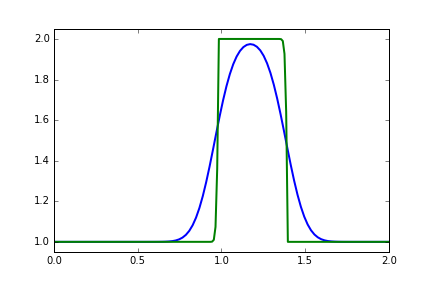
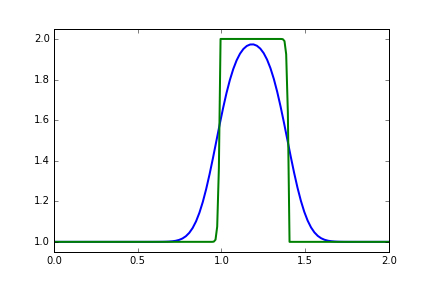
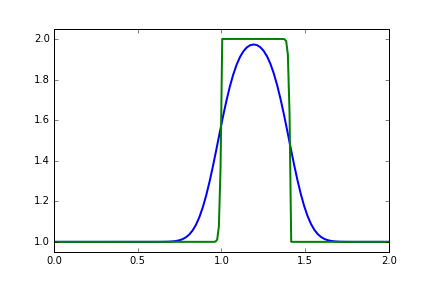
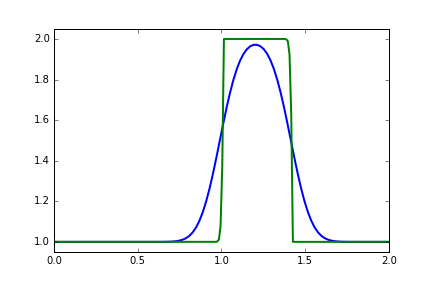
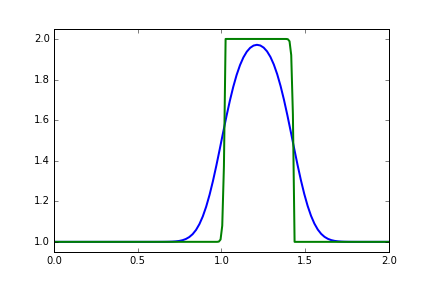
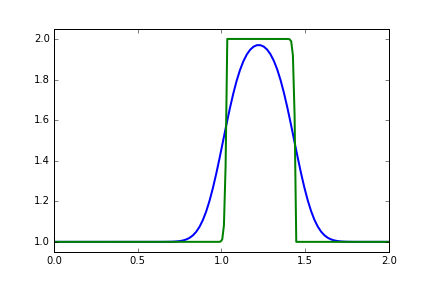
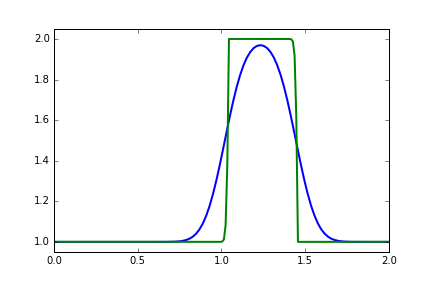
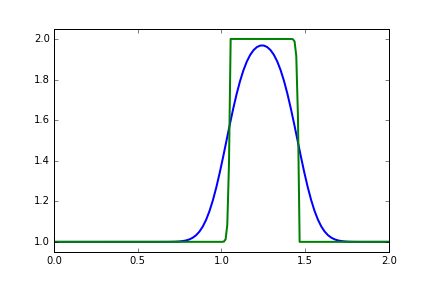
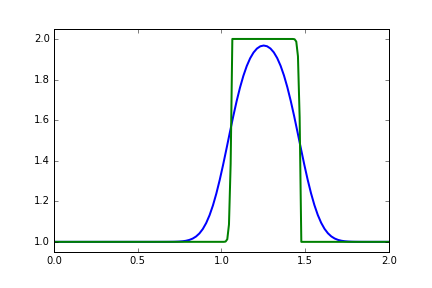
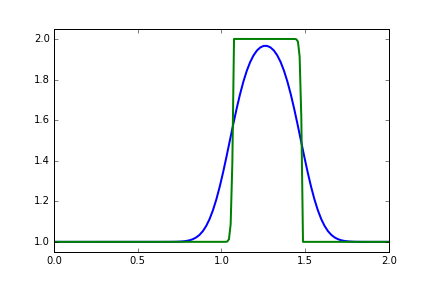
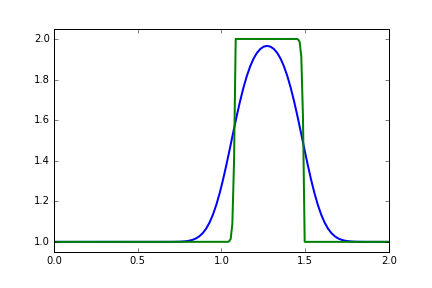

In [108]:
L = 2.          #Longitud de la malla
dt = 0.01       #Separacion temporal, Delta t
nx1= 100
nx2= 200

#Condicion inicial primer grafico
dx1 = L/(nx1-1)
u01 = ones(nx1)
u01[int(.1/dx1) : int(0.5/dx1+1.)]=2

#Condicion inicial segundo grafico
dx2 = L/(nx2-1.)
u02 = ones(nx2)
u02[int(.1/dx2) : int(0.5/dx2+1.)]=2

u1_sol = avance_en_tiempo(u01, 100, nx1, dt, dx1, True)
u2_sol = avance_en_tiempo(u02, 100, nx2, dt, dx2, True)

# Se define el ambiente en el que queremos hacer la animación
fig = figure()
ax = axes(xlim=(0, L), ylim=(0.95, 2.05))
linea1, = ax.plot([], [], lw=2)
linea2, = ax.plot([], [], lw=2)
T = 50 # periodo para generar T cuadros

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [])
    linea2.set_data([], [])
    return linea1,linea2

# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x1 = linspace(0, L, nx1)
    x2 = linspace(0, L, nx2)
    y1 = u1_sol[i]
    y2 = u2_sol[i]
    linea1.set_data(x1, y1),linea2.set_data(x2, y2),
    return linea1,linea2,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func=init, frames=2*T, interval=20, blit=True)

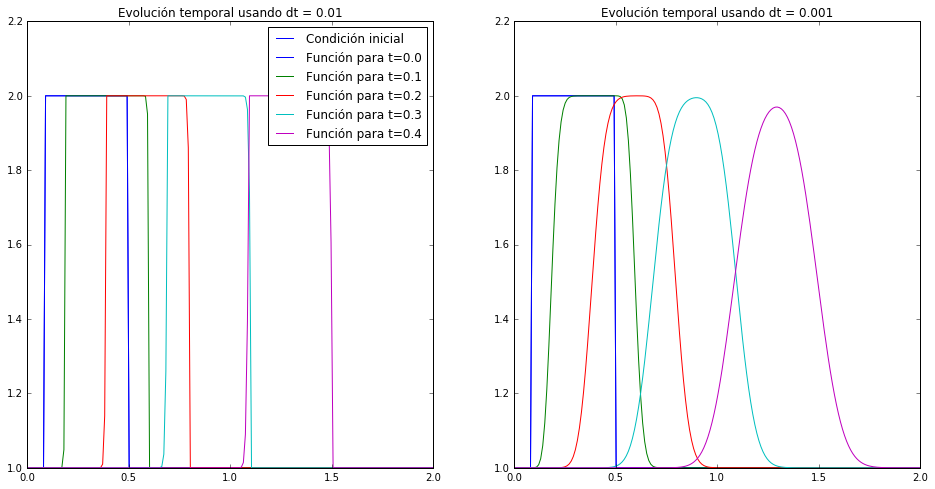

In [6]:
L = 2.          #Longitud de la malla
Nx = 200
dx = L/(Nx-1)#Distancia entre los puntos de la malla, Delta x
f, (ax, bx) = subplots(1, 2, figsize=(16, 8))


#Condicion inicial primer grafico
u0 = ones(Nx)
u0[int(.1/dx) : int(0.5/dx+1.)]=2

for nt in range(0, 50, 10):
    ax.plot(linspace(0, L, Nx), avance_en_tiempo(u0, nt, Nx, 0.01, dx),label=u'Función para t='+str(nt*0.01))

#Condicion inicial primer grafico
u0 = ones(Nx)
u0[int(.1/dx) : int(0.5/dx+1.)]=2

for nt in range(0, 500, 100):
    bx.plot(linspace(0, L, Nx), avance_en_tiempo(u0, nt, Nx, 0.001, dx),label=u'Función para t='+str(nt*0.001))

ax.set_title(u"Evolución temporal usando dt = 0.01")
bx.set_title(u"Evolución temporal usando dt = 0.001")
ax.legend()

Notemos que en el caso de un menos dt la solución numérica se aleja de la solución real ya que tiene que realizar un mayor número de pasos y por ende ocurre una acumulación de errores numericos que desvía la solución numérica de la solución real.


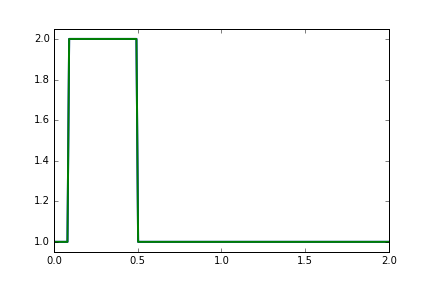
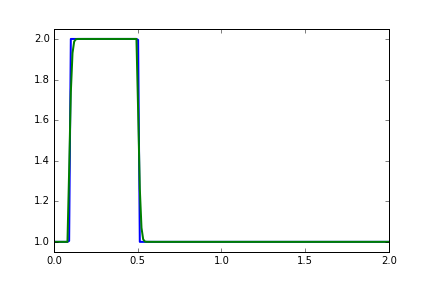
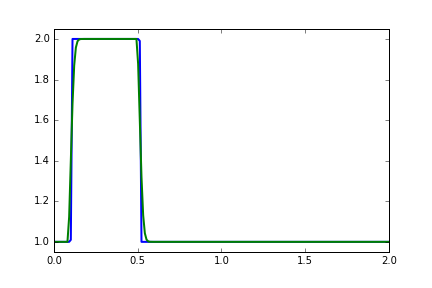
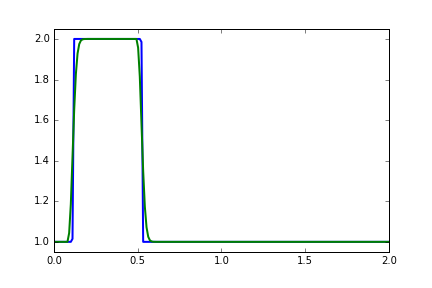
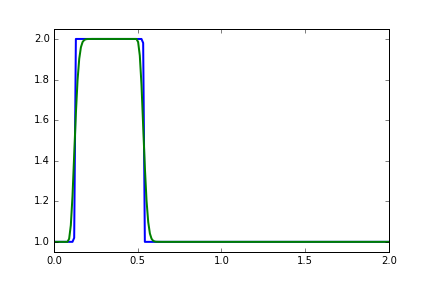
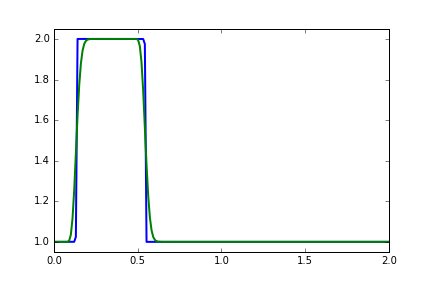
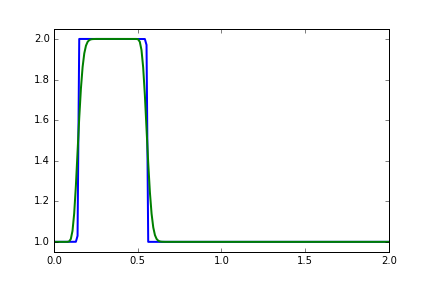
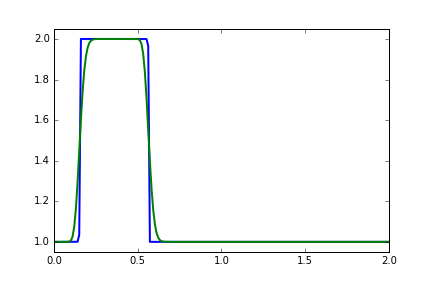
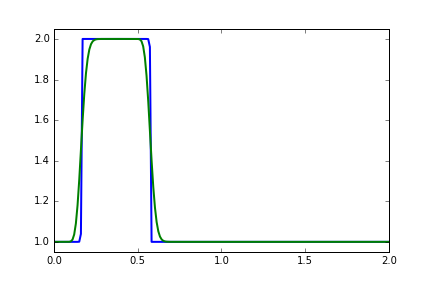
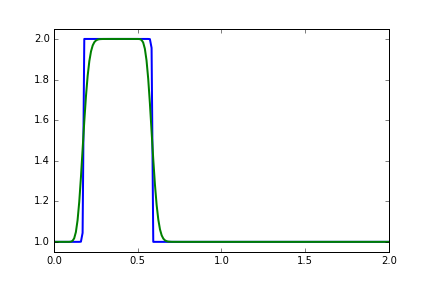
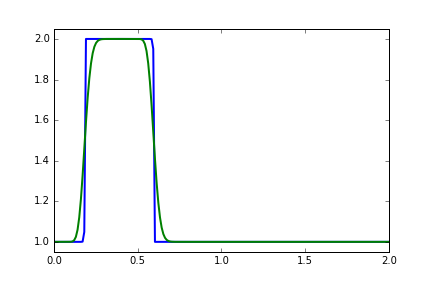
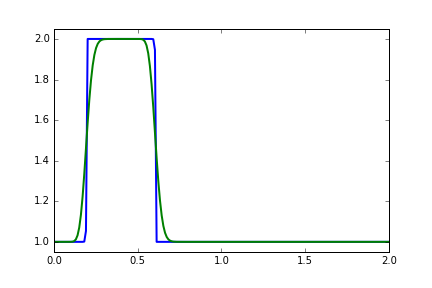
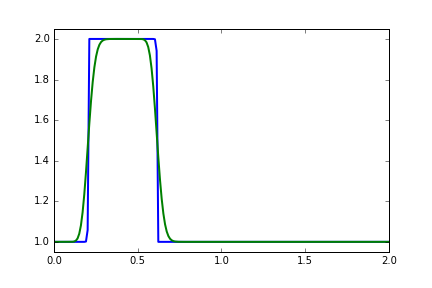
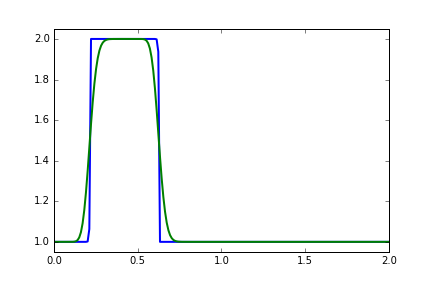
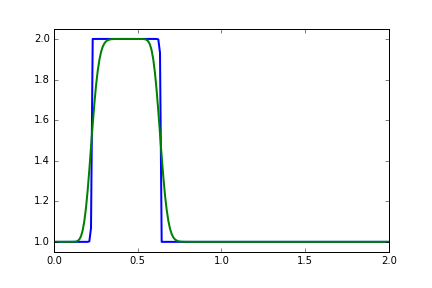
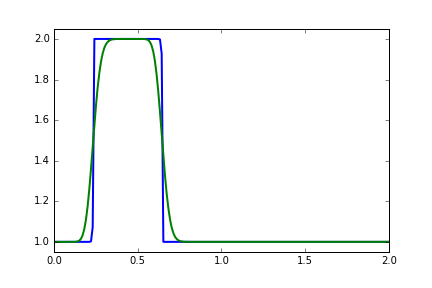
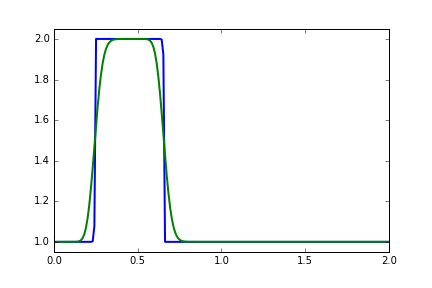
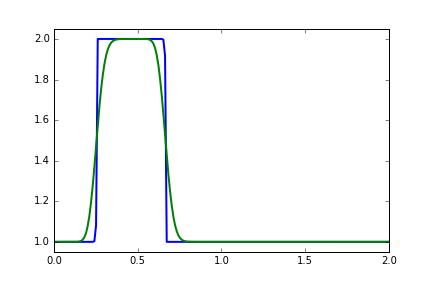
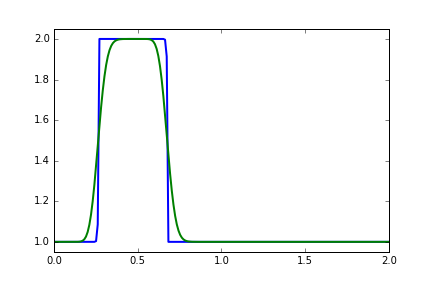
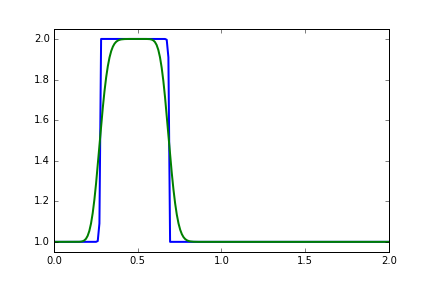
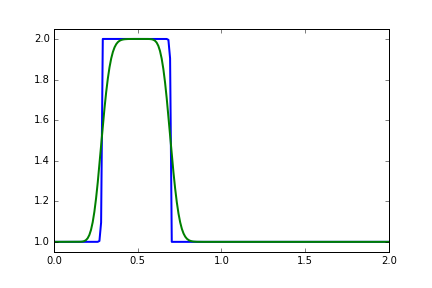
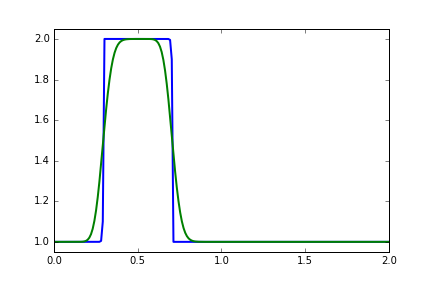
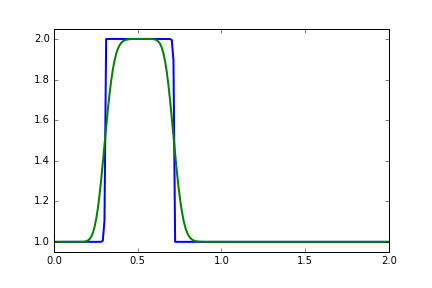
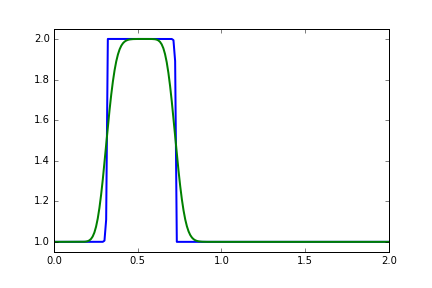
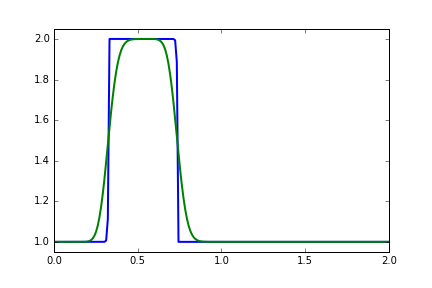
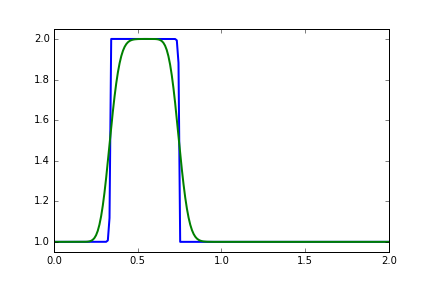
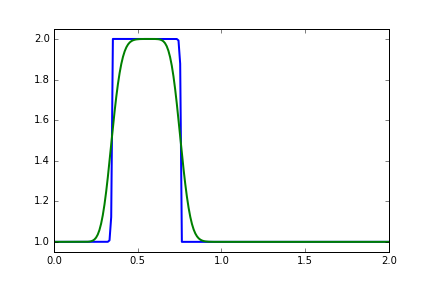
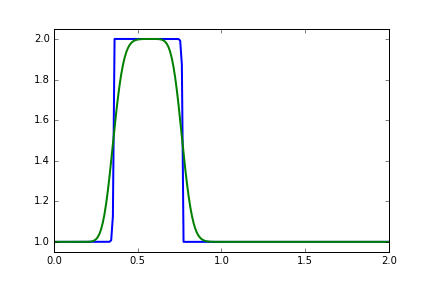
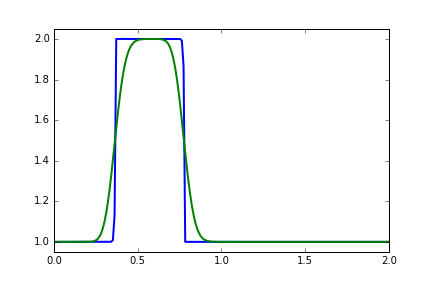
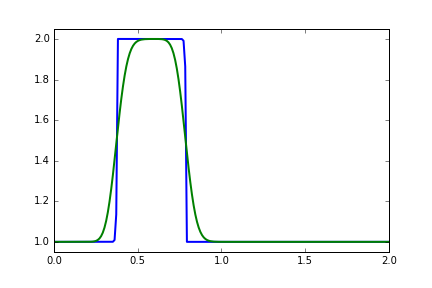
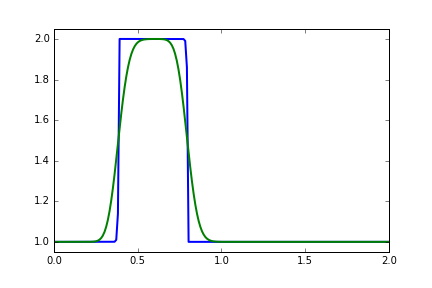
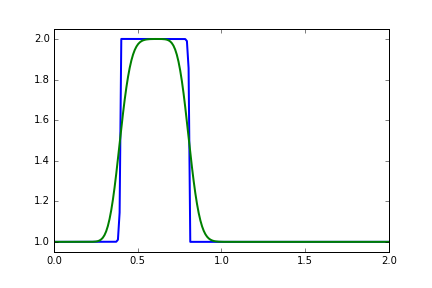
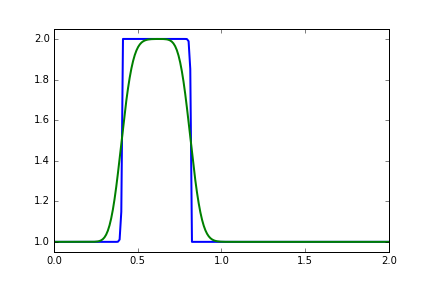
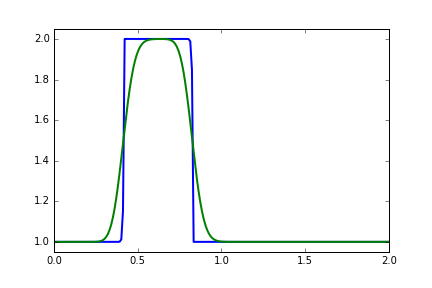
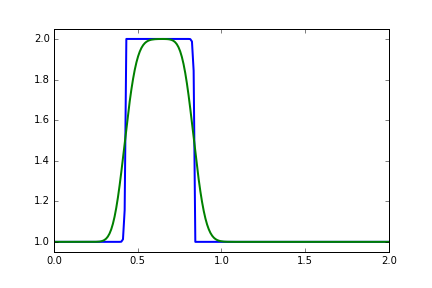
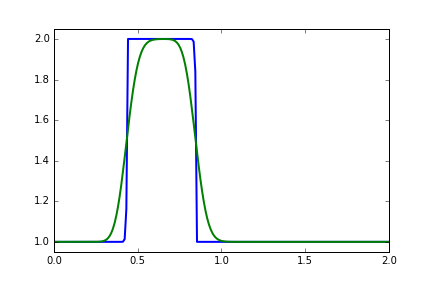
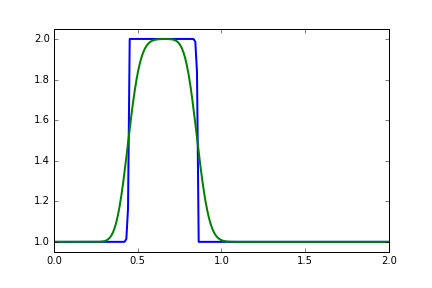
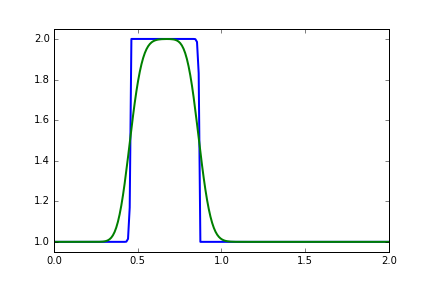
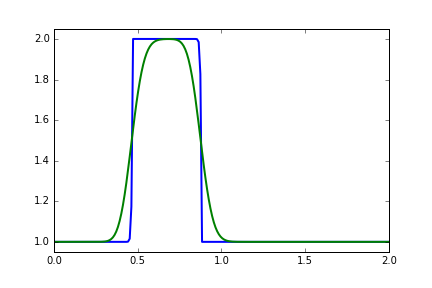
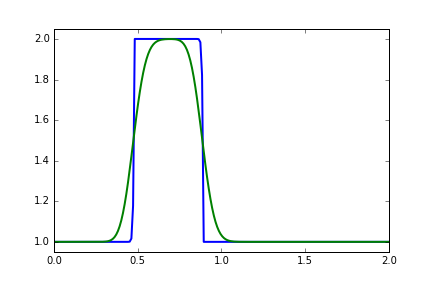
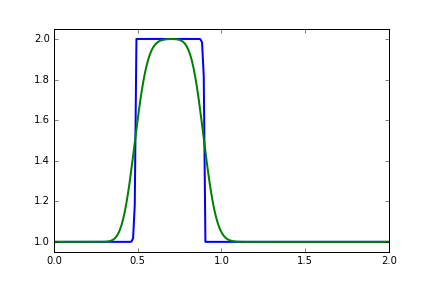
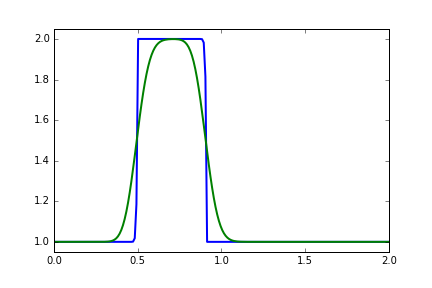
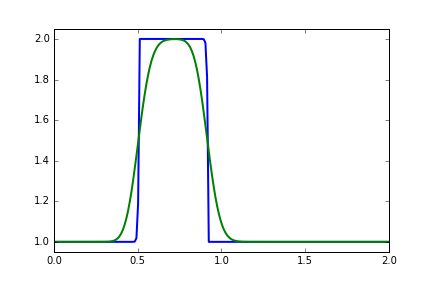
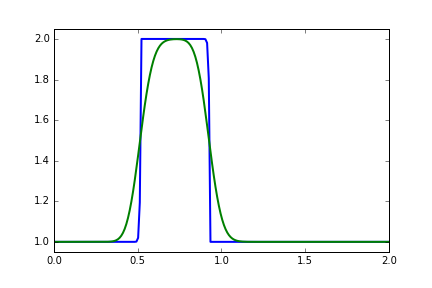
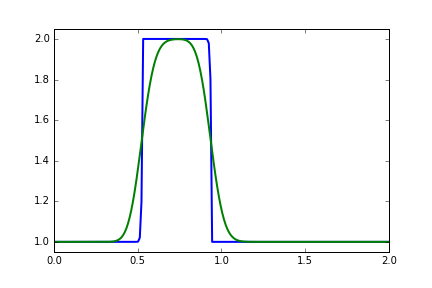
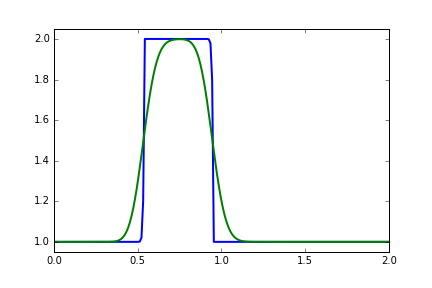
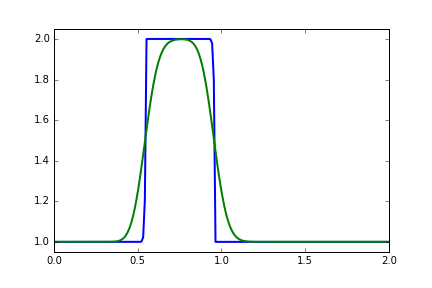
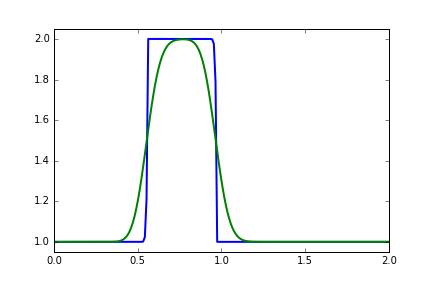
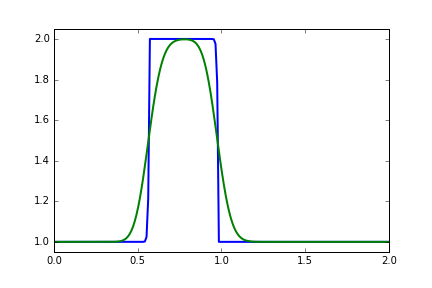
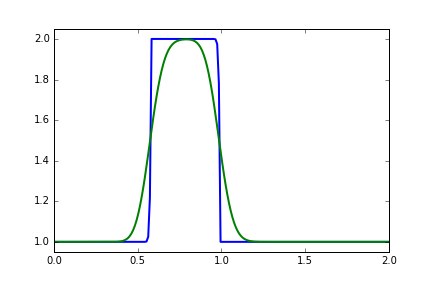
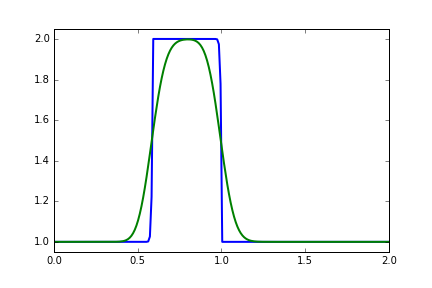
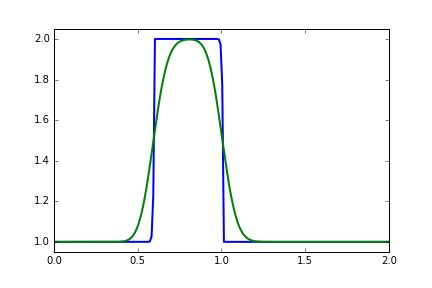
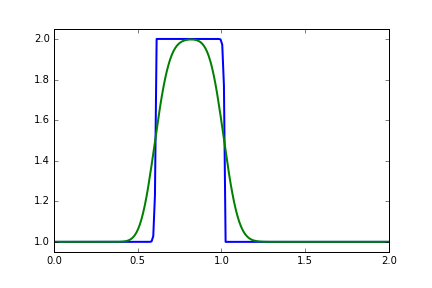
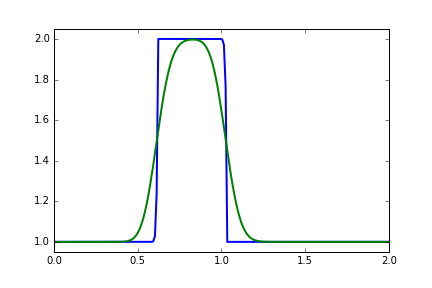
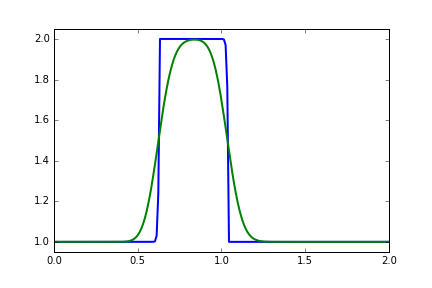
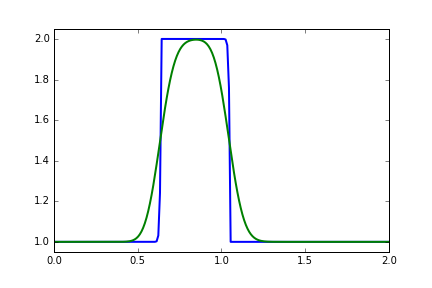
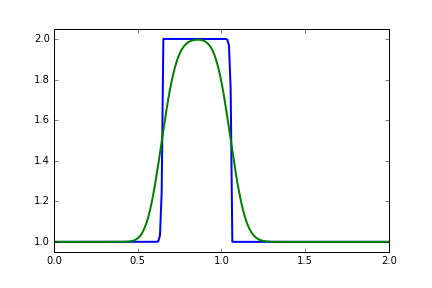
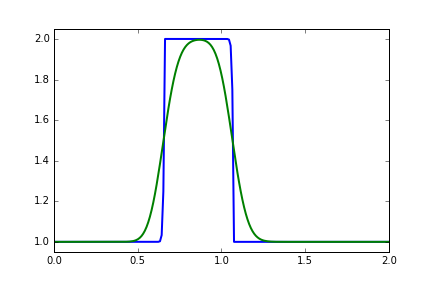
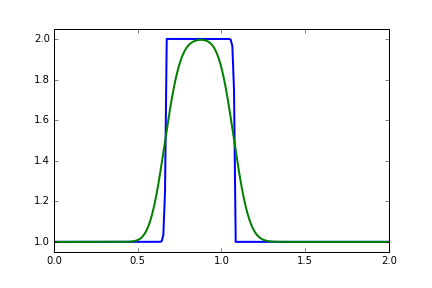
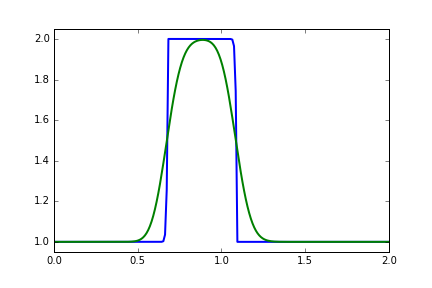
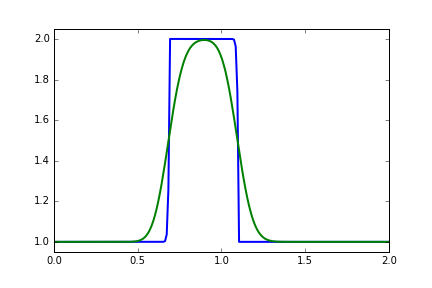
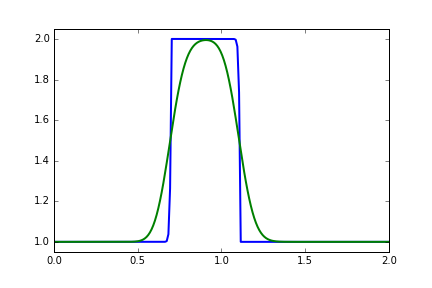
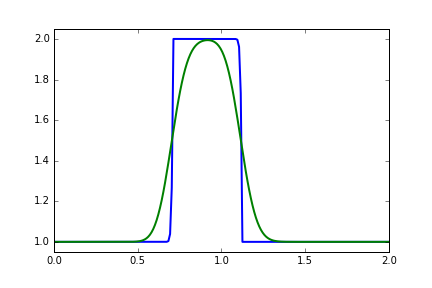
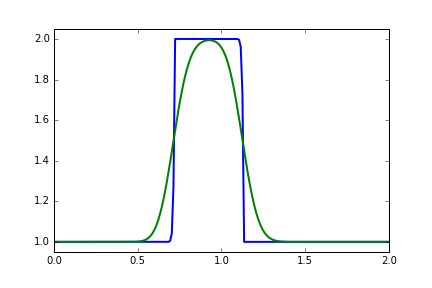
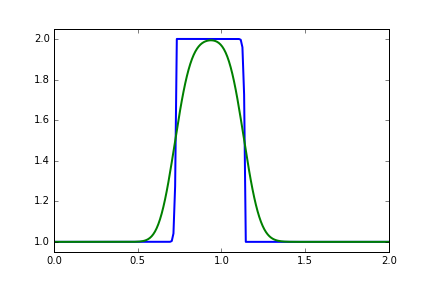
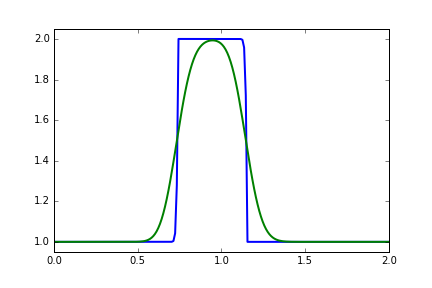
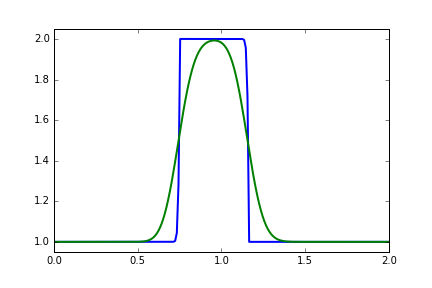
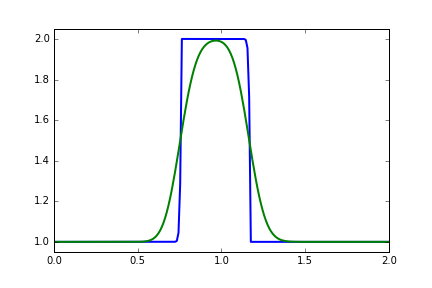
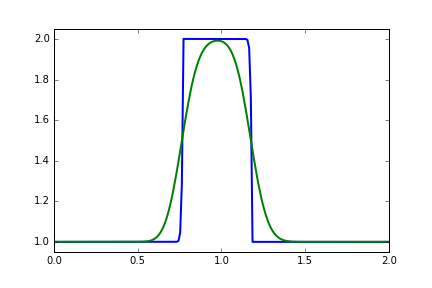
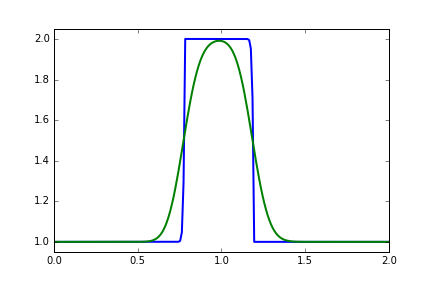
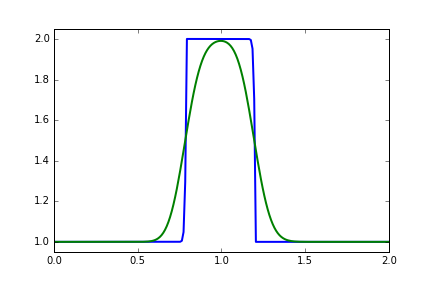
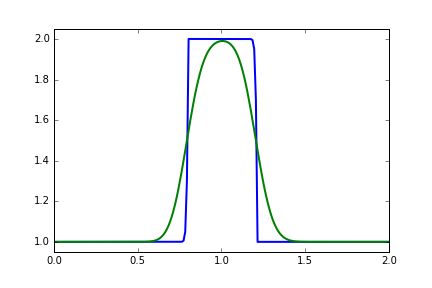
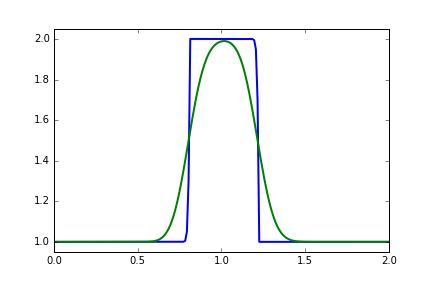
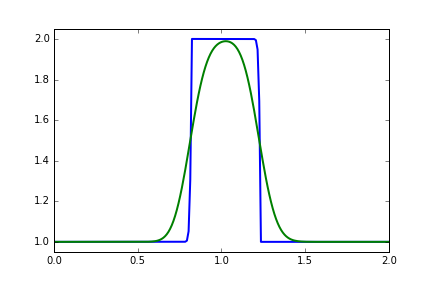
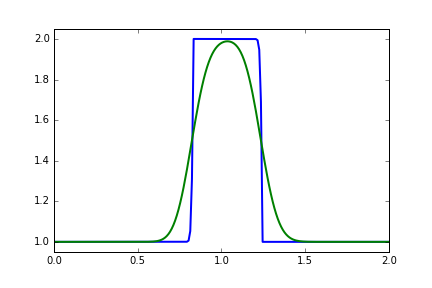
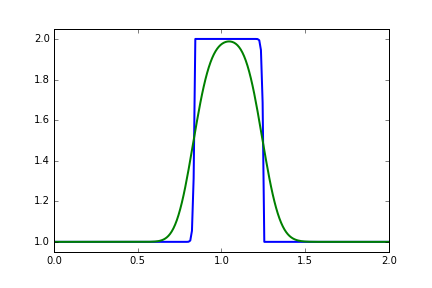
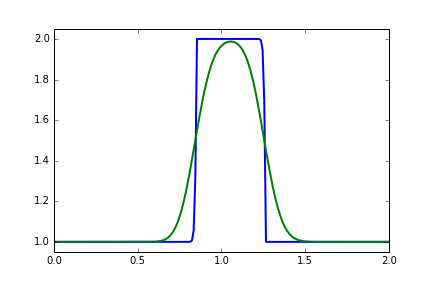
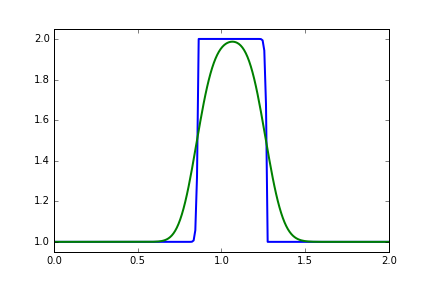
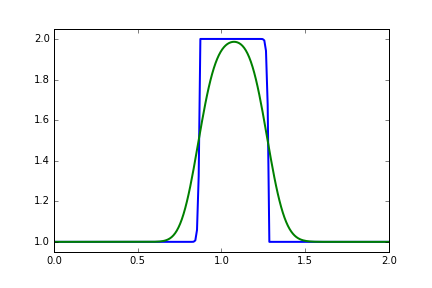
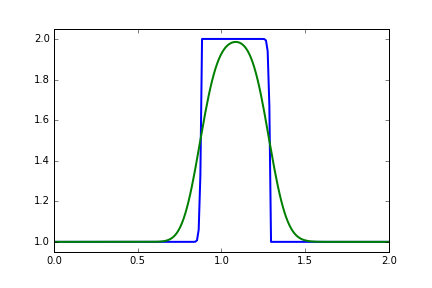
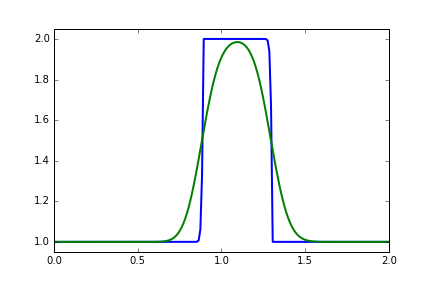
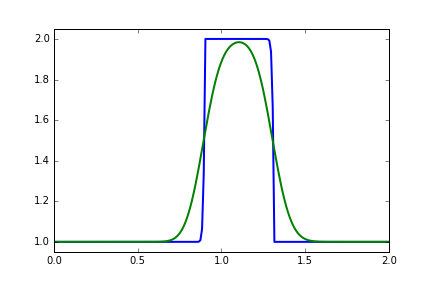
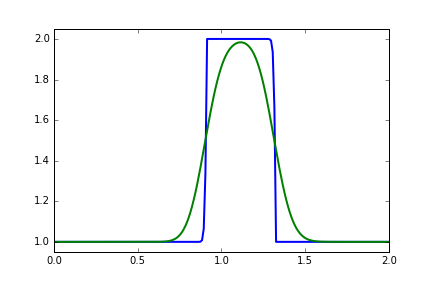
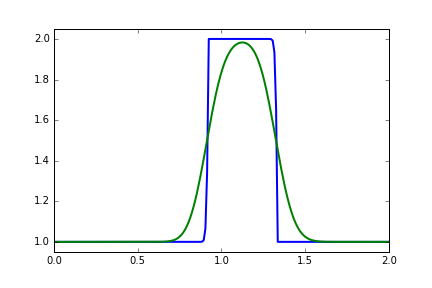
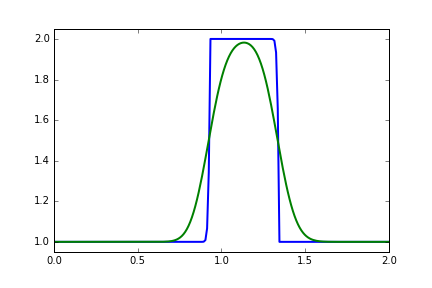
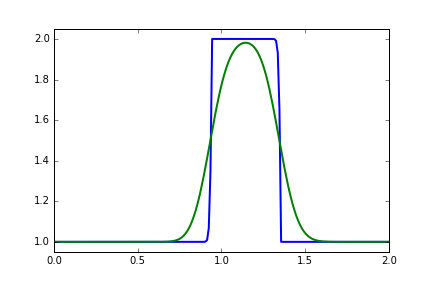
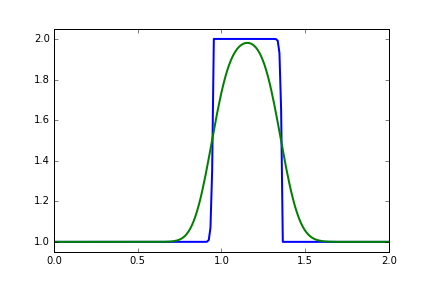
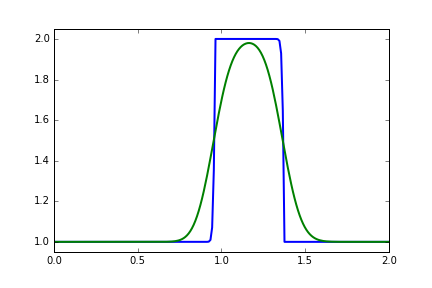
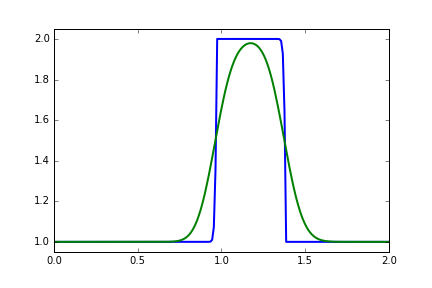
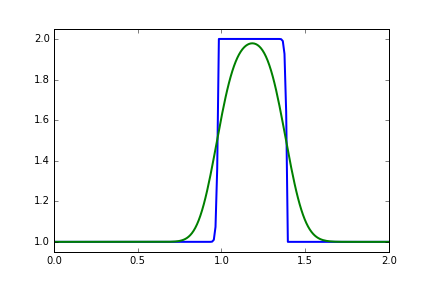
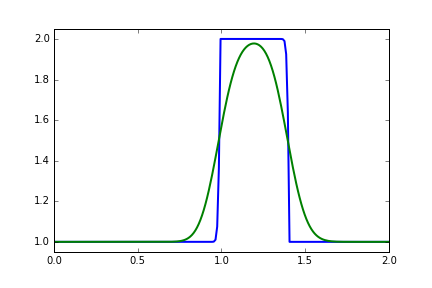
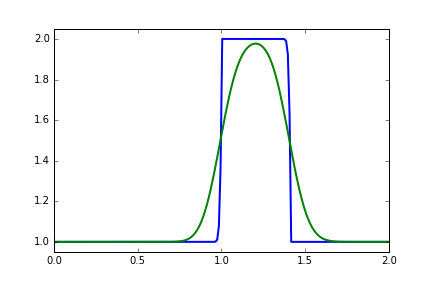
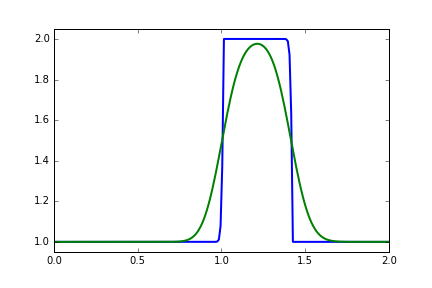
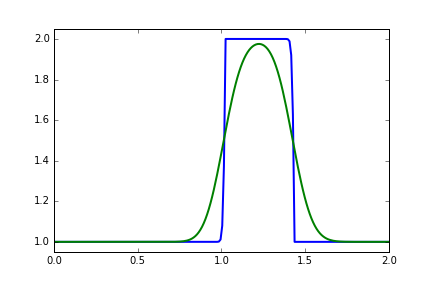
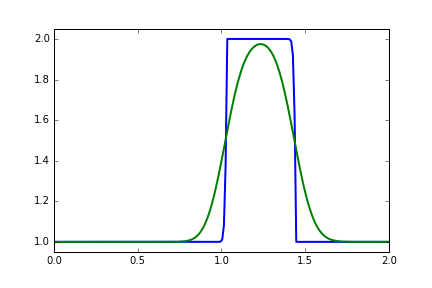
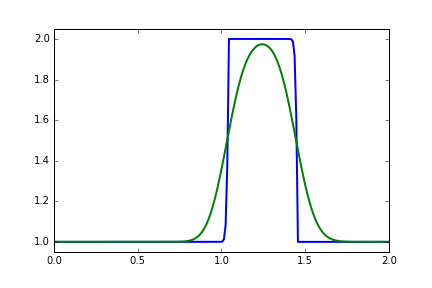
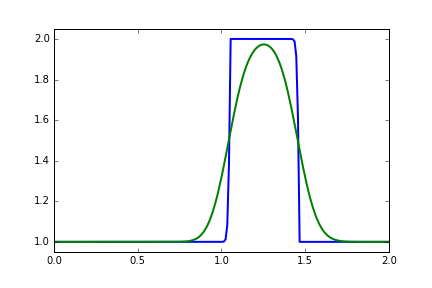
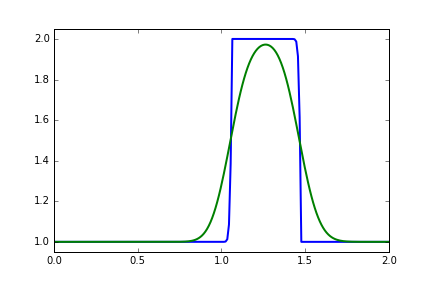
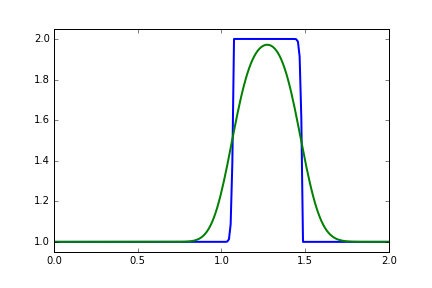
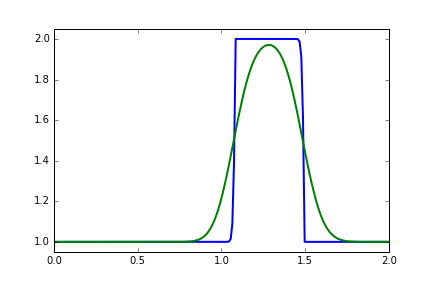

In [109]:
L = 2.          #Longitud de la malla
dt = 0.01       #Separacion temporal, Delta t
nx= 200

dx= L/(nx-1)

u01 = ones(nx)
u01[int(.1/dx) : int(0.5/dx+1.)]=2
u1_sol = avance_en_tiempo(u01, 100, nx, 0.01, dx, True)

u01 = ones(nx)
u01[int(.1/dx) : int(0.5/dx+1.)]=2
u2_sol = avance_en_tiempo(u01, 1000, nx, 0.001, dx, True)


# Se define el ambiente en el que queremos hacer la animación
fig = figure()
ax = axes(xlim=(0, L), ylim=(0.95, 2.05))
linea1, = ax.plot([], [], lw=2)
linea2, = ax.plot([], [], lw=2)
T = 50 # periodo para generar T cuadros

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [])
    linea2.set_data([], [])
    return linea1,linea2

# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x = linspace(0, L, nx)
    y1 = u1_sol[i]
    y2 = u2_sol[10*i]
    linea1.set_data(x, y1),linea2.set_data(x, y2),
    return linea1,linea2,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func=init, frames=2*T, interval=20, blit=True)